step 1: import everything that is needed fot building ML models for risk analysis

In [1]:
# import data analysis tools
import pandas as pd
import numpy as np
import os
import datetime as dt

# import plotting tool for charts
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# add those in case notebook doesn't show the full dataframe when it's too big.
pd.options.display.max_columns =None
pd.options.display.max_rows =None

In [3]:
# import pre processing tools
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler, label_binarize, LabelEncoder, OneHotEncoder

# import model splitting
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# import model choices
# choice 1: yes or no model
from sklearn.linear_model import LogisticRegression
# choice 2: single decision tree
from sklearn.tree import DecisionTreeClassifier
# choice 3: multiple decision trees + voting for the final decision
from sklearn.ensemble import RandomForestClassifier
# choice 4: multiple decision trees + one correct the one before it
from sklearn.ensemble import GradientBoostingClassifier

# import the things for model evaluations
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, auc


step 2, import history data (data pool)

In [4]:
from google.colab import files
uploads = files.upload()

Saving BMO_MLCoE_CaseStudy_Dataset.csv to BMO_MLCoE_CaseStudy_Dataset.csv


In [5]:
df1 = pd.read_csv("BMO_MLCoE_CaseStudy_Dataset.csv")

/tmp/ipython-input-2815601781.py:1: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("BMO_MLCoE_CaseStudy_Dataset.csv")


In [6]:
df1.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.

In [74]:
from google.colab import files
uploads2 = files.upload()

Saving BMO_MLCoE_CaseStudy_DataDictionary.xlsx to BMO_MLCoE_CaseStudy_DataDictionary.xlsx


In [7]:
df_II = pd.read_excel("BMO_MLCoE_CaseStudy_DataDictionary.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'BMO_MLCoE_CaseStudy_DataDictionary.xlsx'

In [76]:
df_II

,LoanStatNew,Unnamed: 1,Description
0,acc_now_delinq,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,addr_state,The state provided by the borrower in the loan...
3,all_util,all_util,Balance to credit limit on all trades
4,annual_inc,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,bc_util,Ratio of total current balance to high credit/...


step 3: read and clean the data

In [6]:
# check and clean the first csv's data cos this is the base data for model building
df1.shape

(42538, 144)

In [7]:
list(df1.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [8]:
# check targeted column --  'loan_status'
df1[ 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,34116
Charged Off,5670
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761


check null values (missing values) and clean the columns that has too many null values

In [6]:
# since we see  "Does not meet the credit policy", we can ignore them cos they don't follow regular risk parttrens and may contain some odd risks
# we drop those rows
df1_1 = df1[df1["loan_status"].isin(["Fully Paid", "Charged Off"])]

In [7]:
df1_1[ 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,34116
Charged Off,5670


In [8]:
# write a function to see the null values in each columns
# so we can see whcih columns to keep and which columns to drop
def df_miss_value(df1_1):
  # get the sum of null values in each columns
  mis_val = df1_1.isnull().sum()
  # get the percentage of the null values in each columns
  mis_val_percentage = df1_1.isnull().sum()/ len(df1_1) * 100

  # put the sum and percentage into one table
  mis_val_tb = pd.concat([mis_val, mis_val_percentage], axis=1 )
  # rename the columns from 0 to 'Missing Values', 1 : '% of Total Values'
  mis_val_tb = mis_val_tb.rename(
      columns = {0: "missing values",
                 1: "% of Total Values"}
  )
  # and we don't need the columns that has missing values that are 0s, so we use iloc to drop them
  mis_val_cleaned = mis_val_tb[mis_val_tb.iloc[:,1]!=0]

  # then according the % decending the table
  mis_val_cleaned = mis_val_cleaned.sort_values("% of Total Values", ascending= False).round(1)

  # print a sentance for summary
  print(f"the dataframe has {df1_1.shape[1]} columns .\n "
        f"There are {mis_val_cleaned.shape[0]} columns have missing values.")

  # finally we return the columns with null values (the one without null values are not going to be returned)
  return mis_val_cleaned


In [9]:
missing = df_miss_value(df1_1)
#missing

the dataframe has 144 columns .
 There are 102 columns have missing values.


In [10]:
# then we see there are way too many rows have too many null values
# we only keep the rows that have less than 70% of null values
# select the columns that we don't want
high_mis_val = missing[missing["% of Total Values"] > 80]
# make it a list for drop
col_to_drop = high_mis_val.index.tolist()
# drop the columns
df_cleaned = df1_1.drop(columns=col_to_drop)

In [11]:
# check the result by using the function we made
mis_value_table = df_miss_value(df_cleaned)
mis_value_table

the dataframe has 54 columns .
 There are 12 columns have missing values.


,missing values,% of Total Values
mths_since_last_delinq,25727,64.7
desc,12969,32.6
emp_title,2467,6.2
emp_length,1078,2.7
pub_rec_bankruptcies,697,1.8
last_pymnt_d,71,0.2
chargeoff_within_12_mths,56,0.1
collections_12_mths_ex_med,56,0.1
revol_util,50,0.1
tax_liens,39,0.1


In [12]:
# check duplicates
df_cleaned[df_cleaned.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag


In [13]:
# since there are so many duplicates we need to delete them
df_cleaned = df_cleaned.drop_duplicates()

In [14]:
#check the df again
df_cleaned.shape
df_cleaned["loan_status"].value_counts()

,count
loan_status,
Fully Paid,34116
Charged Off,5670


Step 4: exploratory data analysis

4.1 check if the data is balanced or imbalanced -- to see the percentage of each side of data

In [15]:
# since ML only eats 1 and 0, we need to encode varibles
# create a new column called "target" and encode "charged off"=1, "Fully Paid"=0
df_cleaned["Target"] = df_cleaned["loan_status"].apply(lambda x:1 if x == "Charged Off" else 0)

In [16]:
# calculate the percentage of charged off users
round(df_cleaned["Target"].sum()/df_cleaned.shape[0],2)
# so it's very imbalanced data

np.float64(0.14)

4.2 drop columns that're related to results to prevent "data leakage" (don't tell your ML model the results)

In [73]:
df_cleaned.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,Target
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,May-19,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N,0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N,1


In [17]:
data_leakage_cols = ['funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                     'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                     'last_pymnt_amnt','chargeoff_within_12_mths','debt_settlement_flag']

In [18]:
# drop the columns
df_cleaned= df_cleaned.drop(columns = data_leakage_cols)

4.3 find the columns with constant values -- same values all columns which means it doesn't have any meanings, so we find them and then drop them

In [19]:
constant_col = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1 ]

In [20]:
constant_col

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt',
 'tax_liens',
 'hardship_flag']

In [21]:
# drop them
df_cleaned = df_cleaned.drop(columns = constant_col)

In [22]:
list(df_cleaned.columns)

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'pub_rec_bankruptcies',
 'Target']

4.4 features binning

it means to group similair values together (put them into different bins) , for models to learn or for us to unterupt.

in here we choose the column 'mths_since_last_delinq', whcih represents how long since the user's last Delinquency. eg: delayed payment, etc.

**Only do for one variable to save time: `mths_since_last_delinq`**
- -1 'no delinq'
- 0-1 '<1 month'
- 1-3 '<3 months'
- 3-6 '<6 months'
- 6-12 '<1 year'
- 12-24 '<2 years'
- 24-36 '<3 years'
- 36-48 '<4 years'
- 48-60 '<5 years'
- 60-72 '<6 years'
- 72-84 '<7 years'
- 84-121 '<10 years'

<Axes: ylabel='Frequency'>

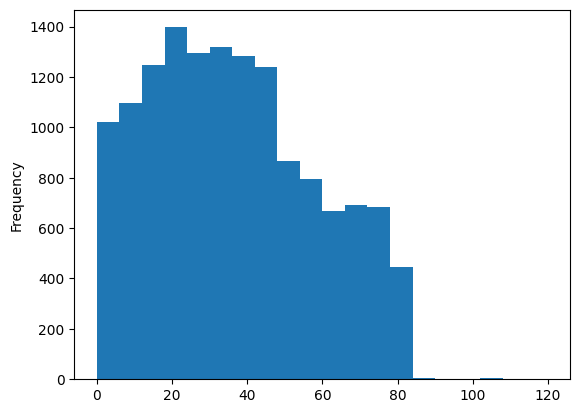

In [25]:
# grab the column 'mths_since_last_delinq' to see visually how this thing displays
df_cleaned['mths_since_last_delinq'].plot(kind = "hist", bins = 20)

In [22]:
# since there are NaN (null values) we change them with "-1" regard as "never delinquent"
df_cleaned['mths_since_last_delinq'] = df_cleaned['mths_since_last_delinq'].fillna(value= -1)

In [23]:
# set the boundries of mounths for each bin
mounth_for_bins = [-1, 0, 2, 4, 7, 13, 25, 37, 49, 61, 73, 85, 122]
# set the names for bins
bin_lables = ['no delinquent', '<1 mounth', '<3 mounth', '<6 mounth', '<1 yesr', '<2 year', '<3 year', '<4 year', '<5 year', '<6 year', '<7 year', '<10 year']
# set up the bins by using pd.cut
df_cleaned['mths_since_last_delinq_cut'] = pd.cut(
    df_cleaned['mths_since_last_delinq'],
    bins = mounth_for_bins,
    labels= bin_lables,
    right = False # the very right side of the limit doesn't count
)

In [24]:
# drop the original column
df_cleaned.drop(columns=['mths_since_last_delinq'], inplace=True )

In [25]:
df_cleaned['mths_since_last_delinq_cut'].value_counts()

,count
mths_since_last_delinq_cut,
no delinquent,25727
<2 year,2690
<3 year,2583
<4 year,2506
<5 year,1594
<6 year,1355
<1 yesr,1099
<7 year,1004
<6 mounth,496


In [30]:
# check the df
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39786 entries, 0 to 39785
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   39786 non-null  float64 
 1   term                        39786 non-null  object  
 2   int_rate                    39786 non-null  object  
 3   installment                 39786 non-null  float64 
 4   grade                       39786 non-null  object  
 5   sub_grade                   39786 non-null  object  
 6   emp_title                   37319 non-null  object  
 7   emp_length                  38708 non-null  object  
 8   home_ownership              39786 non-null  object  
 9   annual_inc                  39786 non-null  float64 
 10  verification_status         39786 non-null  object  
 11  issue_d                     39786 non-null  object  
 12  loan_status                 39786 non-null  object  
 13  desc                 

In [26]:
# select data types that are "object" and "category"
# reason: We want to analyze categorical features separately

df_cat  = df_cleaned.select_dtypes(include= ["object", "category"] )
list(df_cat.columns)

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'mths_since_last_delinq_cut']

In [27]:
# drop the aim column 'loan_status', and create a list of all category columns
cat_col = list(df_cat.drop(columns = ['loan_status']).columns) # get the name of the columns
cat_col

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'mths_since_last_delinq_cut']

In [28]:
# then strip the columns values in original df_cleaned
for i in cat_col:
  df_cleaned[i] = df_cleaned[i].str.strip()

In [107]:
# check the columns agian
df_cleaned[cat_col].head(3)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d,mths_since_last_delinq_cut
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,Jan-15,May-19,no delinquent
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,Oct-16,no delinquent
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,NaN,small_business,real estate business,606xx,IL,Nov-01,98.50%,Jun-14,Jun-17,no delinquent


In [29]:
# since we have removed the columns with single values, we need to check if the columns that have some values dominate the others
# and we turn the results into a dataframe for easier reading
for i in cat_col:
  print(df_cleaned[i].value_counts().to_frame )

# way too many distict values

Streaming output truncated to the last 5000 lines.
Angela- Home imp loan                                                                  1
CHRISTOPHERS LOAN                                                                      1
MTA personal loan                                                                      1
dominican republic                                                                     1
Consloidation loan                                                                     1
LOAN A                                                                                 1
SeaRey                                                                                 1
Scotland Loan                                                                          1
Credit Card Refinance Nov 2010                                                         1
navi loan                                                                              1
Three and Debt Free!!!                                     

In [36]:
df_cleaned['emp_title'].value_counts()
# way too many distict values

Output hidden; open in https://colab.research.google.com to view.

In [39]:
df_cleaned['title'].value_counts()
# same problem

Output hidden; open in https://colab.research.google.com to view.

In [40]:
df_cleaned.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,Target,mths_since_last_delinq_cut
0,5000.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,Jan-15,May-19,0.0,0,no delinquent
1,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,Apr-13,Oct-16,0.0,1,no delinquent
2,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,Jun-14,Jun-17,0.0,0,no delinquent


In [30]:
# drop those useless columns
# build a list of useless columns
drop_feature=['desc','issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line', 'emp_title',
             'emp_length', 'zip_code','title', 'purpose','sub_grade']
# drop the columns
df_cleaned = df_cleaned.drop(columns = drop_feature, axis =1)

In [31]:
# check the rest of the category columns
remain_cat_feature  = [i for i in cat_col if i not in drop_feature]
remain_cat_feature

['term',
 'int_rate',
 'grade',
 'home_ownership',
 'verification_status',
 'addr_state',
 'revol_util',
 'mths_since_last_delinq_cut']

encode remaining category columns

In [32]:
# check the column : 'revol_util'
df_cleaned['revol_util'].info()
# df_cleaned['revol_util'].value_counts()
# found out that % is object and now we change this column into float

<class 'pandas.core.series.Series'>
Index: 39786 entries, 0 to 39785
Series name: revol_util
Non-Null Count  Dtype 
--------------  ----- 
39736 non-null  object
dtypes: object(1)
memory usage: 621.7+ KB


In [33]:
df_cleaned['revol_util'] = df_cleaned['revol_util'].str.replace('%', '').astype(float) / 100

In [35]:
df_cleaned['revol_util'].value_counts()
# okay perfect

,count
revol_util,
0.0000,980
0.0020,63
0.6300,62
0.4070,59
0.0010,58
0.6670,58
0.6100,57
0.6660,57
0.7040,57


In [113]:
# now check the column 'int_rate'
df_cleaned['int_rate'].value_counts()
# same as the previous column , need to drop % and change data type

,count
int_rate,
10.99%,958
13.49%,831
11.49%,826
7.51%,787
7.88%,725
7.49%,656
11.71%,609
9.99%,603
7.90%,582


In [34]:
df_cleaned['int_rate'] = df_cleaned['int_rate'].str.replace('%', '').astype(float) / 100

In [56]:
df_cleaned['int_rate'].value_counts()

,count
int_rate,
0.1099,958
0.1349,831
0.1149,826
0.0751,787
0.0788,725
0.0749,656
0.1171,609
0.0999,603
0.0790,582


In [35]:
# check the column 'verification_status'
df_cleaned['verification_status'].value_counts()

,count
verification_status,
Not Verified,16926
Verified,12844
Source Verified,10016


In [36]:
# encode it with 0 and 1, not verified = 0, the other 2 = 1
df_cleaned['verification_status'] = df_cleaned['verification_status'].apply(lambda x: 0 if x =="Not Verified" else 1)

In [117]:
df_cleaned['verification_status'].value_counts()

,count
verification_status,
1,22860
0,16926


In [37]:
# check the rest of the category(object) columns
list( df_cleaned.select_dtypes(include = ["object"]).columns)

['term',
 'grade',
 'home_ownership',
 'loan_status',
 'addr_state',
 'mths_since_last_delinq_cut']

In [38]:
# drop 'loan_status'
df_cleaned = df_cleaned.drop(columns = ['loan_status'])

In [39]:
# map the grade columns
grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
df_cleaned['grade'] = df_cleaned['grade'].map(grade_map)

one hot encoding for rest category, turn everything into binary 0 and 1

In [40]:
# check the rest columns
for col in ['term','home_ownership','addr_state','mths_since_last_delinq_cut']:
    print(col)
    print(df_cleaned[col].value_counts())
    print('---')


term
term
36 months    29096
60 months    10690
Name: count, dtype: int64
---
home_ownership
home_ownership
RENT        18918
MORTGAGE    17703
OWN          3064
OTHER          98
NONE            3
Name: count, dtype: int64
---
addr_state
addr_state
CA    7105
NY    3817
FL    2872
TX    2734
NJ    1855
IL    1525
PA    1519
VA    1408
GA    1399
MA    1344
OH    1226
MD    1055
AZ     882
WA     842
CO     792
NC     789
CT     754
MI     722
MO     686
MN     616
NV     498
SC     472
WI     460
AL     452
OR     451
LA     436
KY     327
OK     300
KS     272
UT     259
AR     246
DC     214
RI     199
NM     190
WV     177
HI     174
NH     172
DE     114
MT      85
WY      83
AK      81
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64
---
mths_since_last_delinq_cut
mths_since_last_delinq_cut
no delinquent    25727
<2 year           2690
<3 year           2583
<4 year           2506
<5 year           1594
<

In [45]:
# make a function for creating dummies
def cate_convert(df, nan_as_category = True, out_dtype="uint8"):
  #nan_as_category (default = True) → If True, missing values (NaN) will also get their own dummy column.

  # store original columns into a list
  original_col = list(df.columns)

  # find categorial columns
  cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

  # one hot encoding
  df_ohe = pd.get_dummies(df, columns = cat_cols, dummy_na=nan_as_category , dtype=out_dtype)

  # keep the new columns only -- for the columns that are not in original columns
  new_columns = [col for col in df_ohe.columns if col not in original_col]

  # return df as a transformed dataframe, and new_columns returns to a list of new columns created
  return df_ohe, new_columns


In [46]:
# Use it
df_encoded, dummy_col = cate_convert(df_cleaned, nan_as_category=True, out_dtype="uint8")


\

In [43]:
df_encoded[dummy_col].dtypes.unique()

array([dtype('uint8')], dtype=object)

In [47]:
df_encoded[dummy_col].head(3)

,term_36 months,term_60 months,term_nan,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,home_ownership_nan,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,addr_state_nan,mths_since_last_delinq_cut_<1 mounth,mths_since_last_delinq_cut_<1 yesr,mths_since_last_delinq_cut_<10 year,mths_since_last_delinq_cut_<2 year,mths_since_last_delinq_cut_<3 mounth,mths_since_last_delinq_cut_<3 year,mths_since_last_delinq_cut_<4 year,mths_since_last_delinq_cut_<5 year,mths_since_last_delinq_cut_<6 mounth,mths_since_last_delinq_cut_<6 year,mths_since_last_delinq_cut_<7 year,mths_since_last_delinq_cut_no delinquent,mths_since_last_delinq_cut_nan
0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


use the previous missing value function we made to find Null value columns

In [49]:
miss_value = df_miss_value(df_encoded)
miss_value

the dataframe has 89 columns .
 There are 2 columns have missing values.


,missing values,% of Total Values
pub_rec_bankruptcies,697,1.8
revol_util,50,0.1


In [51]:
# change the Null Values with 0
df_encoded['pub_rec_bankruptcies'] = df_encoded['pub_rec_bankruptcies'].fillna(value = 0)
df_encoded['revol_util'] = df_encoded['revol_util'].fillna(value = 0)

In [53]:
# check again
miss_val = df_miss_value(df_encoded)

the dataframe has 89 columns .
 There are 0 columns have missing values.


In [54]:
# get a copy of the final csv file
final_encode = df_encoded.copy()

In [56]:
import datetime
filename = f"final_dataset_{datetime.datetime.now().strftime('%Y%m%d-%H%M')}.csv"
final_encode.to_csv(filename, index=False)